In [1]:
!cd ../../ && python3 setup.py build_ext --inplace

Found following files to build:
 src/nanopyx/core/transform/noise/randomNoise.pyx
running build_ext


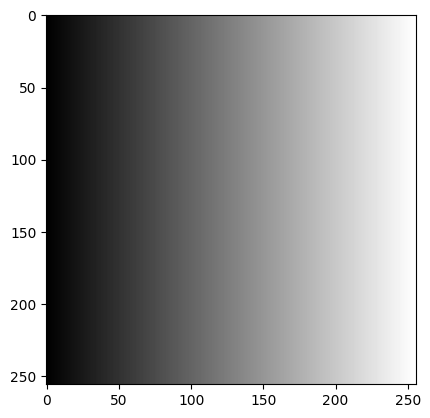

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# create an intensity gradient image
image = np.zeros((256, 256), dtype="float32")
for i in range(256):
    image[:, i] = i
image_original = image.copy()

# display the image
plt.imshow(image, cmap='gray')
plt.show()


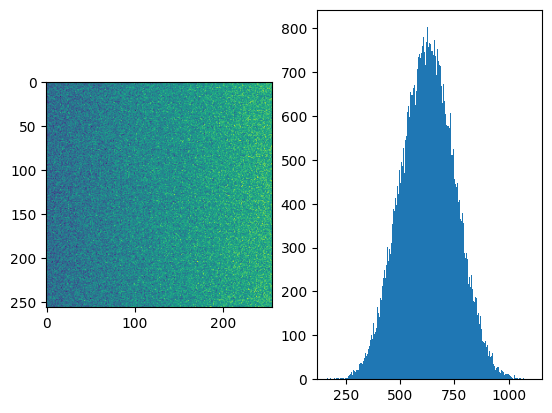

In [3]:
from nanopyx.core.transform.noise.randomNoise import addMixedGaussianPoissonNoise

image_flat = image.ravel()
addMixedGaussianPoissonNoise(image_flat, gaussSigma = 100, gaussMean = 500)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
# Show the image on the first subplot
ax1.imshow(image)
# Show the intensity histogram on the second subplot
ax2.hist(image.flatten(), bins=256)
# Show the figure
plt.show()



In [4]:
gaussSigma = 100
gaussMean = 500

import numpy as np
r = np.random.RandomState()
image = image_original.copy()

def f(image):
    image[:] = np.clip(r.poisson(image)+r.normal(loc=gaussMean, scale=gaussSigma), 0, 65535)[:]
    
%timeit f(image)

image = image_original.copy()
image_flat = image.ravel()
%timeit addMixedGaussianPoissonNoise(image_flat, gaussSigma = gaussSigma, gaussMean = gaussMean)

4.64 ms ± 489 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
17.6 ms ± 357 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
